In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data, check base features

In [2]:
from perovskite_prediction_api.common.storage import GoogleDriveStorage
from perovskite_prediction_api.common.credentials import google_credentials

storage = GoogleDriveStorage(google_credentials())
df = storage.download_dataframe("perovskite/prepared/data.csv")
df = df.rename(columns={"Perovskite_band_gap": "band_gap"})
df.head()

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,...,B_2_coef,B_3_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
0,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,0.06,0,pin,False,False,False,0,False,SLG | ITO,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
1,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,0.06,0,pin,False,False,False,0,False,SLG | ITO,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,False,0,False,SLG | FTO,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,False,0,False,SLG | FTO,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.06,0,nip,False,False,False,0,False,SLG | FTO,...,-1.0,-1,Br,I,-1,-1,0.51,2.49,-1.0,-1


In [3]:
# select only necessary features
necessary_features = ["band_gap", "Perovskite_dimension_0D", "Perovskite_dimension_2D", "Perovskite_dimension_2D3D_mixture", "Perovskite_dimension_3D", "Perovskite_composition_inorganic", "A_1", "A_2", "A_3", "A_4", "A_5", "A_1_coef", "A_2_coef", "A_3_coef", "A_4_coef", "A_5_coef", "B_1", "B_2", "B_3", "B_1_coef", "B_2_coef", "B_3_coef", "C_1", "C_2", "C_3", "C_4", "C_1_coef", "C_2_coef", "C_3_coef", "C_4_coef"]
df = df[necessary_features]
df.head()

,band_gap,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_composition_inorganic,A_1,A_2,A_3,A_4,...,B_2_coef,B_3_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
0,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
1,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
2,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
3,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
4,1.59,False,False,False,True,False,Cs,FA,MA,-1,...,-1.0,-1,Br,I,-1,-1,0.51,2.49,-1.0,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47648 entries, 0 to 47647
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   band_gap                           35970 non-null  float64
 1   Perovskite_dimension_0D            47648 non-null  bool   
 2   Perovskite_dimension_2D            47648 non-null  bool   
 3   Perovskite_dimension_2D3D_mixture  47648 non-null  bool   
 4   Perovskite_dimension_3D            47648 non-null  bool   
 5   Perovskite_composition_inorganic   47648 non-null  bool   
 6   A_1                                47648 non-null  object 
 7   A_2                                47648 non-null  object 
 8   A_3                                47648 non-null  object 
 9   A_4                                47648 non-null  object 
 10  A_5                                47648 non-null  int64  
 11  A_1_coef                           47648 non-null  obj

In [5]:
# drop rows where band gap is NaN
df = df.dropna(subset=["band_gap"])

In [6]:
# check for doublets
df = df[~df.duplicated(subset=[col for col in df.columns if col.startswith(("A_", "B_", "C_"))] + ["band_gap"])]
df

,band_gap,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_composition_inorganic,A_1,A_2,A_3,A_4,...,B_2_coef,B_3_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
0,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
4,1.59,False,False,False,True,False,Cs,FA,MA,-1,...,-1.0,-1,Br,I,-1,-1,0.51,2.49,-1.0,-1
11,1.30,False,False,False,True,True,Cs,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
12,1.40,False,False,False,True,True,Cs,-1,-1,-1,...,-1.0,-1,Br,I,-1,-1,0.6,2.4,-1.0,-1
20,1.50,False,False,False,True,False,FA,-1,-1,-1,...,-1.0,-1,I,-1,-1,-1,3,-1,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47572,1.51,False,False,False,True,False,Cs,FA,-1,-1,...,-1.0,-1,I,-1,-1,-1,3.0,-1,-1.0,-1
47580,1.97,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,Br,I,-1,-1,2.1,0.9,-1.0,-1
47586,1.63,False,False,False,True,False,Cs,FA,MA,-1,...,-1.0,-1,Br,I,-1,-1,0.5,2.5,-1.0,-1
47642,1.79,False,False,False,True,False,MA,-1,-1,-1,...,-1.0,-1,Br,I,-1,-1,1.26,1.74,-1.0,-1


### Model need to work only for`
### A site - MA, FA, BA, Cs
### B site - Pb, Sn, Bi
### C site - I, Br, Cl

In [7]:
def count_ions(_df: pd.DataFrame, site_prefix: str):
    site_cols = [col for col in _df.columns if col.startswith(site_prefix) and "coef" not in col]
    all_ions = _df[site_cols].stack().reset_index(drop=True)
    all_ions = all_ions[all_ions != "-1"]
    all_ions = all_ions[all_ions != -1]
    return all_ions.value_counts()

def plot_ion_counts(ion_counts: pd.DataFrame, site: str):
    plt.figure(figsize=(21, 10))
    ion_counts.plot(kind='bar', color='skyblue')
    plt.title(f'{site}-Site Ions', fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel('Ion')
    plt.ylabel('Count')
    plt.show()

In [8]:
new_a_ion_counts = count_ions(df, 'A')
new_b_ion_counts = count_ions(df, 'B')
new_c_ion_counts = count_ions(df, 'C')

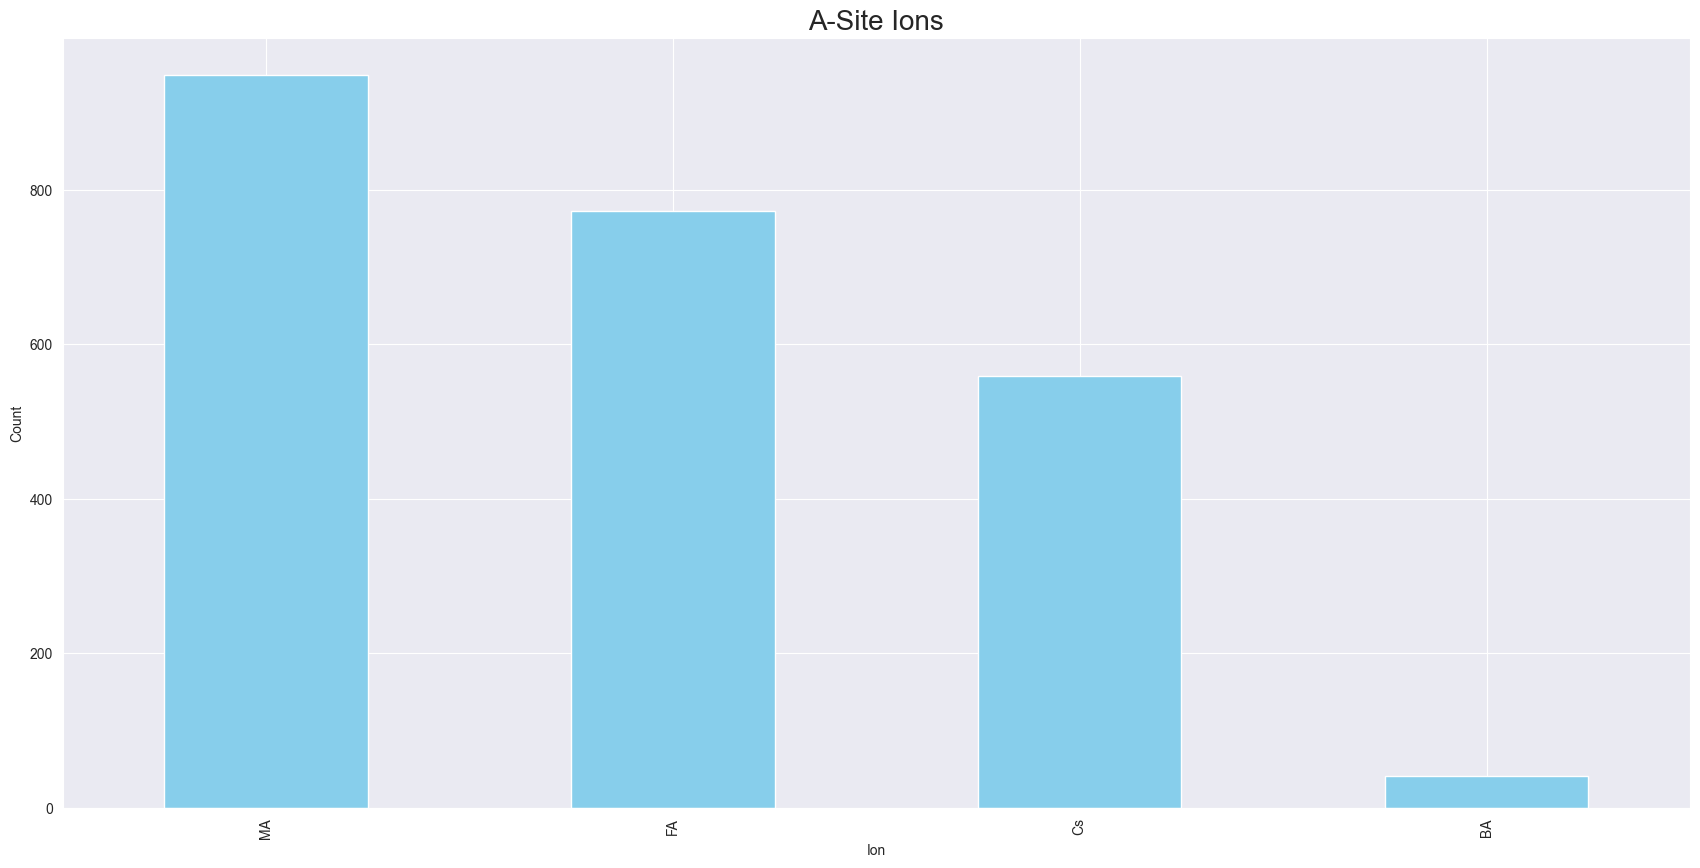

In [9]:
plot_ion_counts(new_a_ion_counts, 'A')

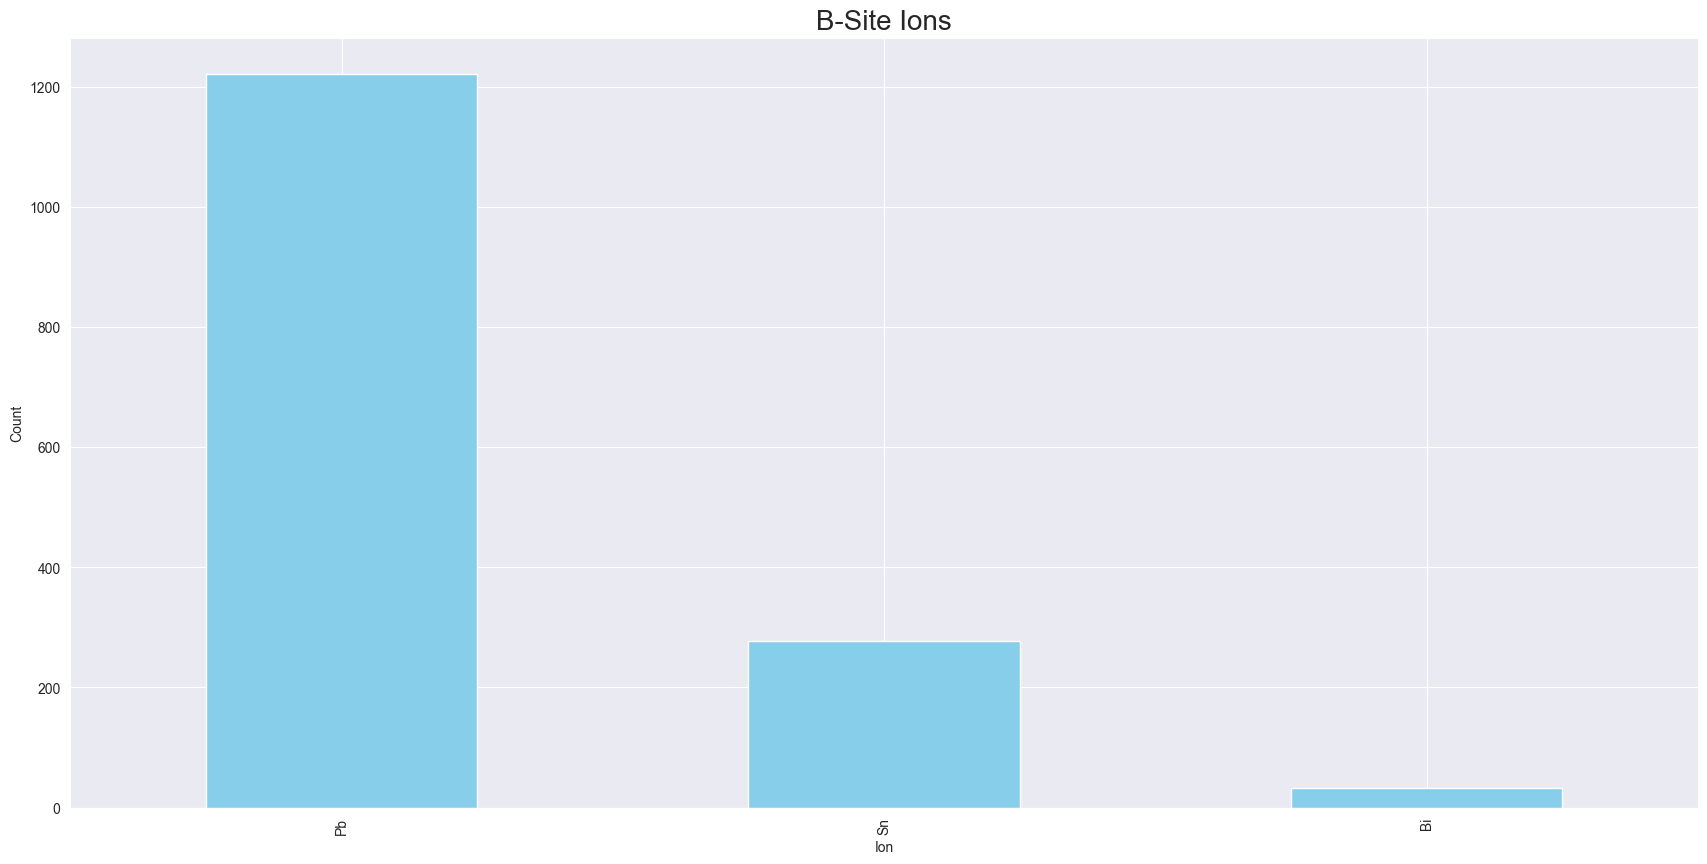

In [10]:
plot_ion_counts(new_b_ion_counts, 'B')

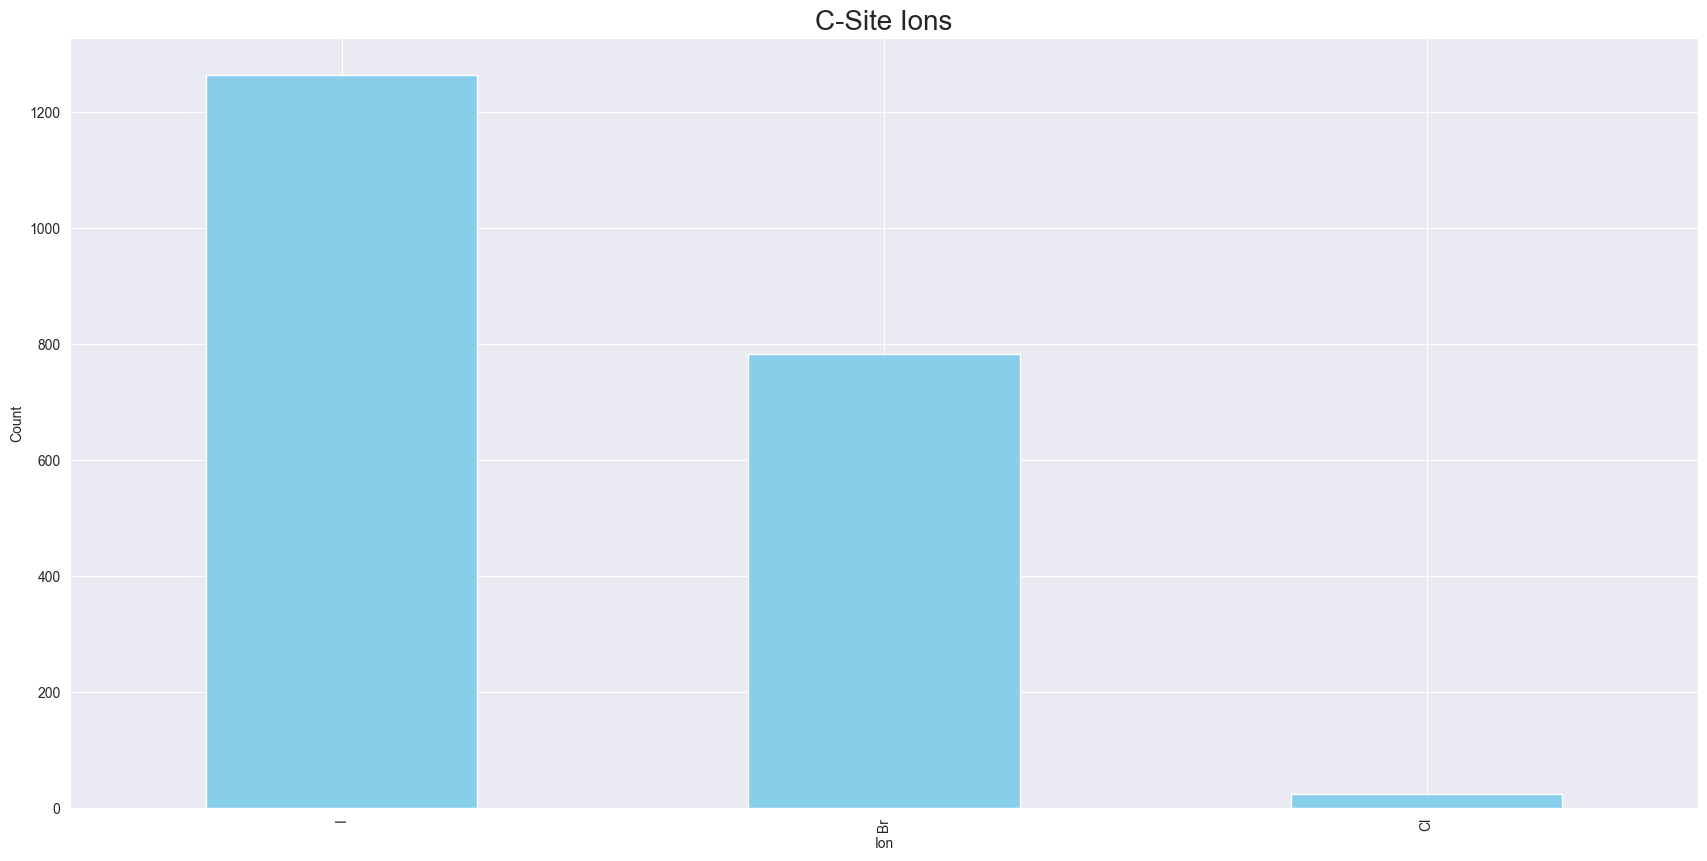

In [11]:
plot_ion_counts(new_c_ion_counts, 'C')

### Calculate useful features

In [12]:
# create composition first
def create_composition_dict(row: pd.Series) -> dict[str, dict[str, float]]:
    composition = {'A': {}, 'B': {}, 'C': {}}

    expected_totals = {'A': 1.0, 'B': 1.0, 'C': 3.0}
    max_slots = {'A': 5, 'B': 3, 'C': 4}

    for ion_prefix in ['A', 'B', 'C']:
        site_dict = {}
        for num in range(1, max_slots[ion_prefix] + 1):
            elem_key = f"{ion_prefix}_{num}"
            coef_key = f"{ion_prefix}_{num}_coef"

            if elem_key not in row:
                continue

            elem = row[elem_key]
            coef = row[coef_key] if coef_key in row else -1

            if elem == -1 or elem == "-1":
                continue
            if isinstance(elem, str) and ("|" in elem or elem.strip() == ""):
                continue

            if isinstance(elem, str):
                elem = elem.replace('(', '').replace(')', '').strip()

            site_dict[elem] = coef
        try:
            site_dict = {k: float(v) for k, v in site_dict.items() if v != 0}
        except ValueError:
           return pd.NA

        if not site_dict:
            return pd.NA

        if any(coef == -1 for coef in site_dict.values()):
            num_ions = len(site_dict)
            inferred_coef = expected_totals[ion_prefix] / num_ions
            site_dict = {ion: inferred_coef for ion in site_dict}
        else:
            total_coef = sum(site_dict.values())
            if total_coef > 0:
                scaling_factor = expected_totals[ion_prefix] / total_coef
                site_dict = {ion: coef * scaling_factor for ion, coef in site_dict.items()}
        composition[ion_prefix] = site_dict

    return composition

In [13]:
df["_composition"] = df.apply(create_composition_dict, axis=1)
if df["_composition"].isna().any():
    print("Some of compositions are NaN, drop them.")
    df = df.dropna(subset=["_composition"])
print("Shape after: ", df.shape)
df.head()

Some of compositions are NaN, drop them.
Shape after:  (1334, 31)


,band_gap,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_composition_inorganic,A_1,A_2,A_3,A_4,...,B_3_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef,_composition
0,1.60,False,False,False,True,False,MA,-1,-1,-1,...,-1,I,-1,-1,-1,3,-1,-1.0,-1,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'..."
4,1.59,False,False,False,True,False,Cs,FA,MA,-1,...,-1,Br,I,-1,-1,0.51,2.49,-1.0,-1,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ..."
11,1.30,False,False,False,True,True,Cs,-1,-1,-1,...,-1,I,-1,-1,-1,3,-1,-1.0,-1,"{'A': {'Cs': 1.0}, 'B': {'Sn': 1.0}, 'C': {'I'..."
12,1.40,False,False,False,True,True,Cs,-1,-1,-1,...,-1,Br,I,-1,-1,0.6,2.4,-1.0,-1,"{'A': {'Cs': 1.0}, 'B': {'Sn': 1.0}, 'C': {'Br..."
20,1.50,False,False,False,True,False,FA,-1,-1,-1,...,-1,I,-1,-1,-1,3,-1,-1.0,-1,"{'A': {'FA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'..."


In [15]:
# calculate effective radii
from perovskite_prediction_api.features.structure_features import compute_effective_radii

df["effective_radii"] = df["_composition"].apply(compute_effective_radii)
df = df[~df["effective_radii"].isnull()]
df["r_A"] = df["effective_radii"].apply(lambda x: x[0])
df["r_B"] = df["effective_radii"].apply(lambda x: x[1])
df["r_C"] = df["effective_radii"].apply(lambda x: x[2])
df.drop(columns=["effective_radii"], inplace=True)
df[["r_A", "r_B", "r_C"]].head()

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_36315/3509418926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["effective_radii"] = df["_composition"].apply(compute_effective_radii)


,r_A,r_B,r_C
0,2.17000,1.19,2.2000
4,2.42868,1.19,2.1592
11,1.67000,1.10,2.2000
12,1.67000,1.10,2.1520
20,2.53000,1.19,2.2000


In [16]:
# calculate factors
from perovskite_prediction_api.features.calc_factors import compute_tolerance_factor, compute_octahedral_factor

df["octahedral_factor"] = df.apply(
    lambda row: compute_octahedral_factor(row["r_B"], row["r_C"]), axis=1
)
df["tolerance_factor"] = df.apply(
    lambda row: compute_tolerance_factor(row["r_A"], row["r_B"], row["r_C"]), axis=1
)
df[["octahedral_factor", "tolerance_factor"]].head()

,octahedral_factor,tolerance_factor
0,0.540909,0.911521
4,0.551130,0.968626
11,0.500000,0.829243
12,0.511152,0.831046
20,0.540909,0.986612


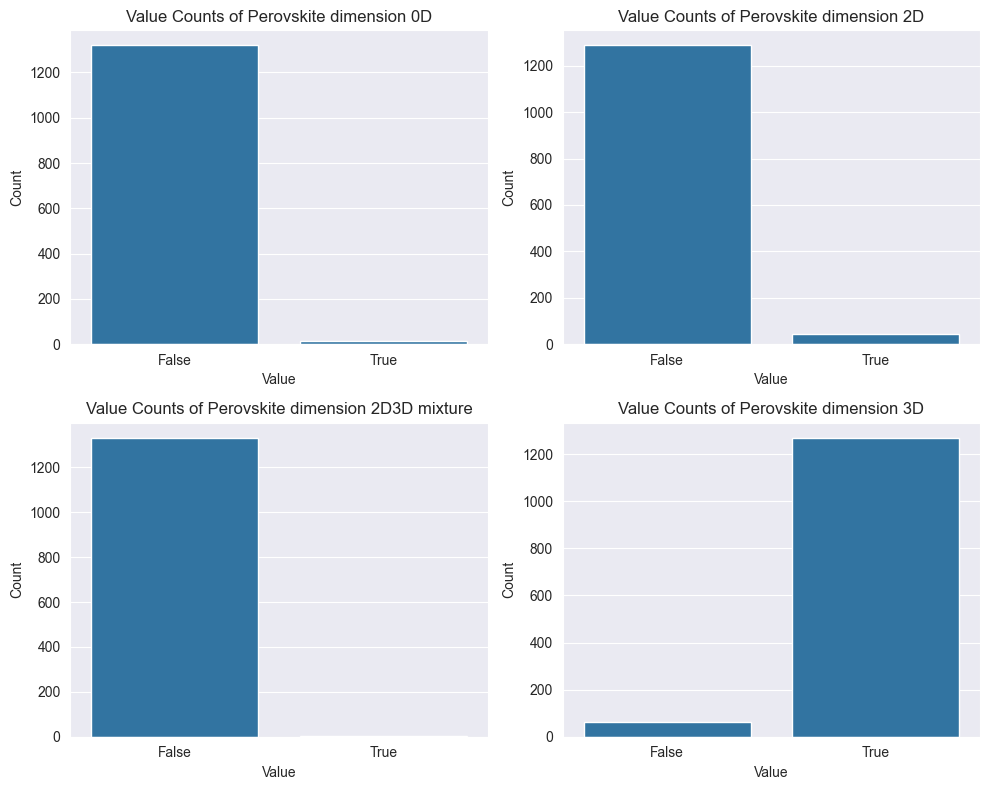

In [17]:
# check dimensions
dimension_columns = ["Perovskite_dimension_0D", "Perovskite_dimension_2D", "Perovskite_dimension_2D3D_mixture", "Perovskite_dimension_3D"]
dimension_info_df = df[dimension_columns]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(dimension_columns):
    value_counts = dimension_info_df[col].value_counts().reindex([False, True], fill_value=0)

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])

    axes[i].set_title(f'Value Counts of {col.replace("_", " ")}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['False', 'True'])

plt.tight_layout()
plt.show()

In [18]:
def get_dimension(row):
    if row['Perovskite_dimension_3D']:
        return '3D'
    elif row['Perovskite_dimension_2D3D_mixture']:
        return '2D3D_mixture'
    elif row['Perovskite_dimension_2D']:
        return '2D'
    elif row['Perovskite_dimension_0D']:
        return '0D'
    else:
        return pd.NA

df["dimension"] = df.apply(get_dimension, axis=1)
print("NaN dimensions count", df[df["dimension"].isna()].shape[0])
df = df.dropna(subset=["dimension"])
df = df.drop(columns=['Perovskite_dimension_3D', 'Perovskite_dimension_2D3D_mixture', 'Perovskite_dimension_2D', 'Perovskite_dimension_0D'])
df["dimension"].head()

NaN dimensions count 2


0     3D
4     3D
11    3D
12    3D
20    3D
Name: dimension, dtype: object

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_36315/3520636815.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Organic/Hybrid", "Inorganic"], fontsize=11)


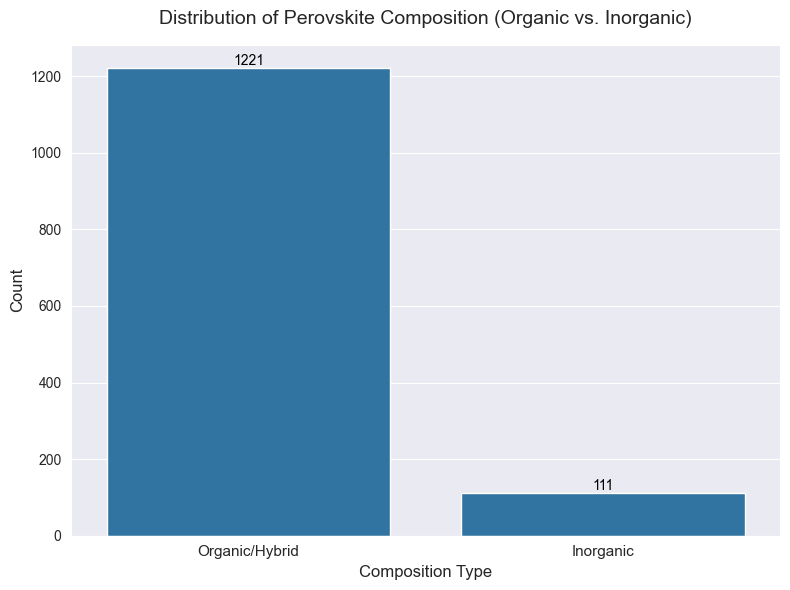

In [19]:
# plot organic/inorganic
plt.figure(figsize=(8, 6))

value_counts = df["Perovskite_composition_inorganic"].value_counts().reindex([False, True], fill_value=0)

ax = sns.barplot(x=value_counts.index, y=value_counts.values)

ax.set_title("Distribution of Perovskite Composition (Organic vs. Inorganic)", fontsize=14, pad=15)
ax.set_xlabel("Composition Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(["Organic/Hybrid", "Inorganic"], fontsize=11)

for i, count in enumerate(value_counts.values):
    ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [20]:
# get space group
from perovskite_prediction_api.entities.v1.structure import SpaceGroup, Dimensions

def get_space_group(row):
    t = row['tolerance_factor']
    dimension = row['dimension']
    is_inorganic = row['Perovskite_composition_inorganic']

    # Handle invalid tolerance factor
    if pd.isna(t):
        return pd.NA

    # 3D Perovskites
    if dimension == Dimensions.THREE_DIM.dimension: #'3D'
        if 0.9 <= t <= 1.0:
            return SpaceGroup.CUBIC.spacegroup  # Cubic
        elif 0.8 <= t < 0.9:
            return SpaceGroup.ORTHOROMBIC.spacegroup if is_inorganic else SpaceGroup.TETRAGONAL.spacegroup  # Orthorhombic or tetragonal
        elif t < 0.8:
            return SpaceGroup.ORTHOROMBIC.spacegroup  # Orthorhombic
        else:  # t > 1.0
            return SpaceGroup.HEXAGONAL.spacegroup  # Hexagonal

    # 2D Perovskites
    elif dimension == Dimensions.TWO_DIM.dimension:
        return SpaceGroup.RUDDLESDEN_POPEN.spacegroup  # Layered structure

    # 2D3D Mixture
    elif dimension == Dimensions.TWO_THREE_DIM_MIXTURE.dimension:
        return SpaceGroup.RUDDLESDEN_POPEN.spacegroup if t < 0.9 else SpaceGroup.ORTHOROMBIC.spacegroup

    # 0D Perovskites
    elif dimension == '0D':
        return pd.NA  # Often molecular, not well-defined

In [21]:
df["space_group"] = df.apply(get_space_group, axis=1)
print("NaN space groups: ", df["space_group"].isna().sum())
df = df.dropna(subset=["space_group"])
df["space_group"].head()

NaN space groups:  14


0     Pm3m
4     Pm3m
11    Pnma
12    Pnma
20    Pm3m
Name: space_group, dtype: object

In [22]:
def plot_dimensions_barplots(_df: pd.DataFrame):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    axes = axes.flatten()
    columns = ["space_group", "dimension"]
    for i, col in enumerate(columns):
        value_counts = _df[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])

        axes[i].set_title(f'Value Counts of {col.replace("_", " ").title()}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Count')

        axes[i].set_xticks(range(len(value_counts.index)))
        if i == 0:  # space_group
            labels = []
            for val in value_counts.index:
                for sg in SpaceGroup:
                    if sg.spacegroup == val:
                        labels.append(sg.name)
                        break
                else:
                    labels.append(val)  # Fallback to raw value if not in SpaceGroup
            axes[i].set_xticklabels(labels, rotation=45)
        else:  # Dimension
            axes[i].set_xticklabels(value_counts.index, rotation=45)

    plt.tight_layout()
    plt.show()

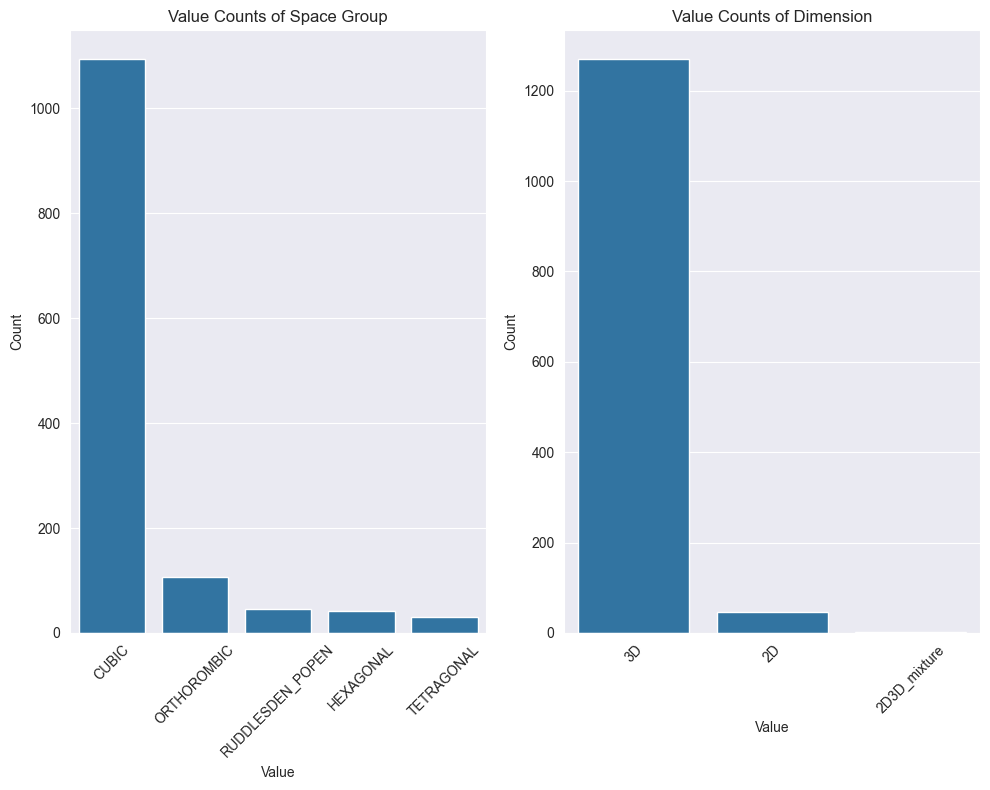

In [23]:
plot_dimensions_barplots(df)

In [24]:
# drop 2D/3D mixture
df = df[df['dimension'] != '2D3D_mixture']

In [25]:
# split to 3d and 2d
df_3d = df[df['dimension'] == '3D']
df_2d = df[df['dimension'] == '2D']
print(f"3D perovskites count - {df_3d.shape[0]}, 2D perovskites count - {df_2d.shape[0]}")
# make only for 3d
df = df_3d

3D perovskites count - 1270, 2D perovskites count - 46


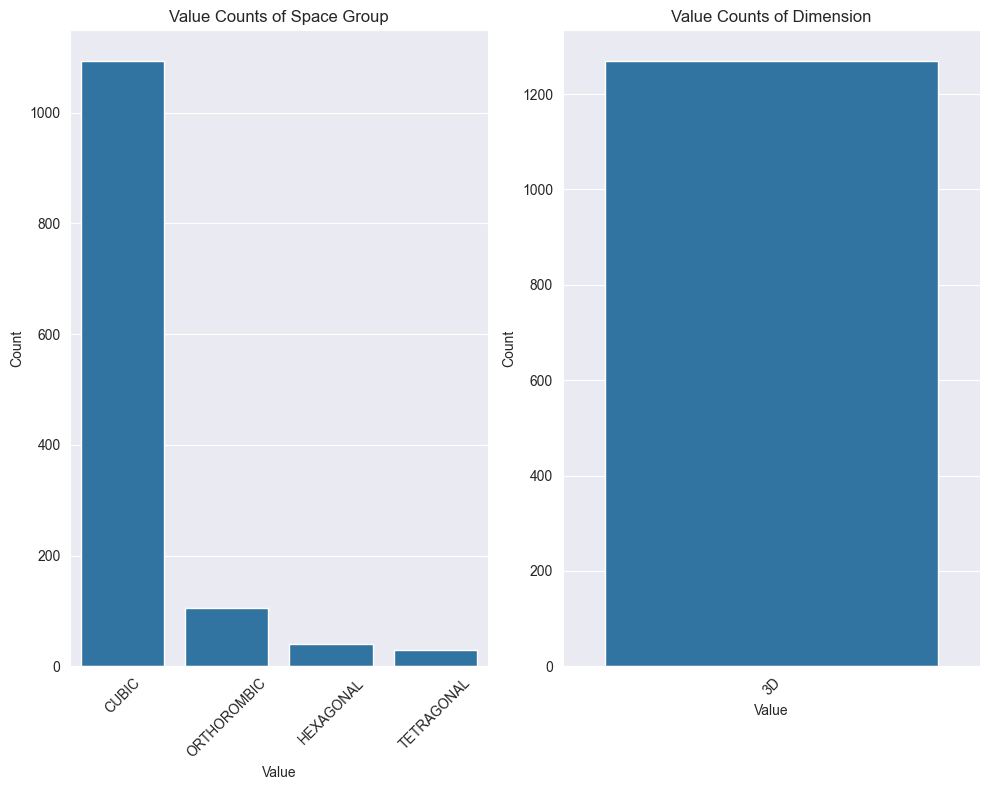

In [26]:
plot_dimensions_barplots(df)

In [27]:
df.drop(columns=["dimension"], inplace=True)

### Correlation

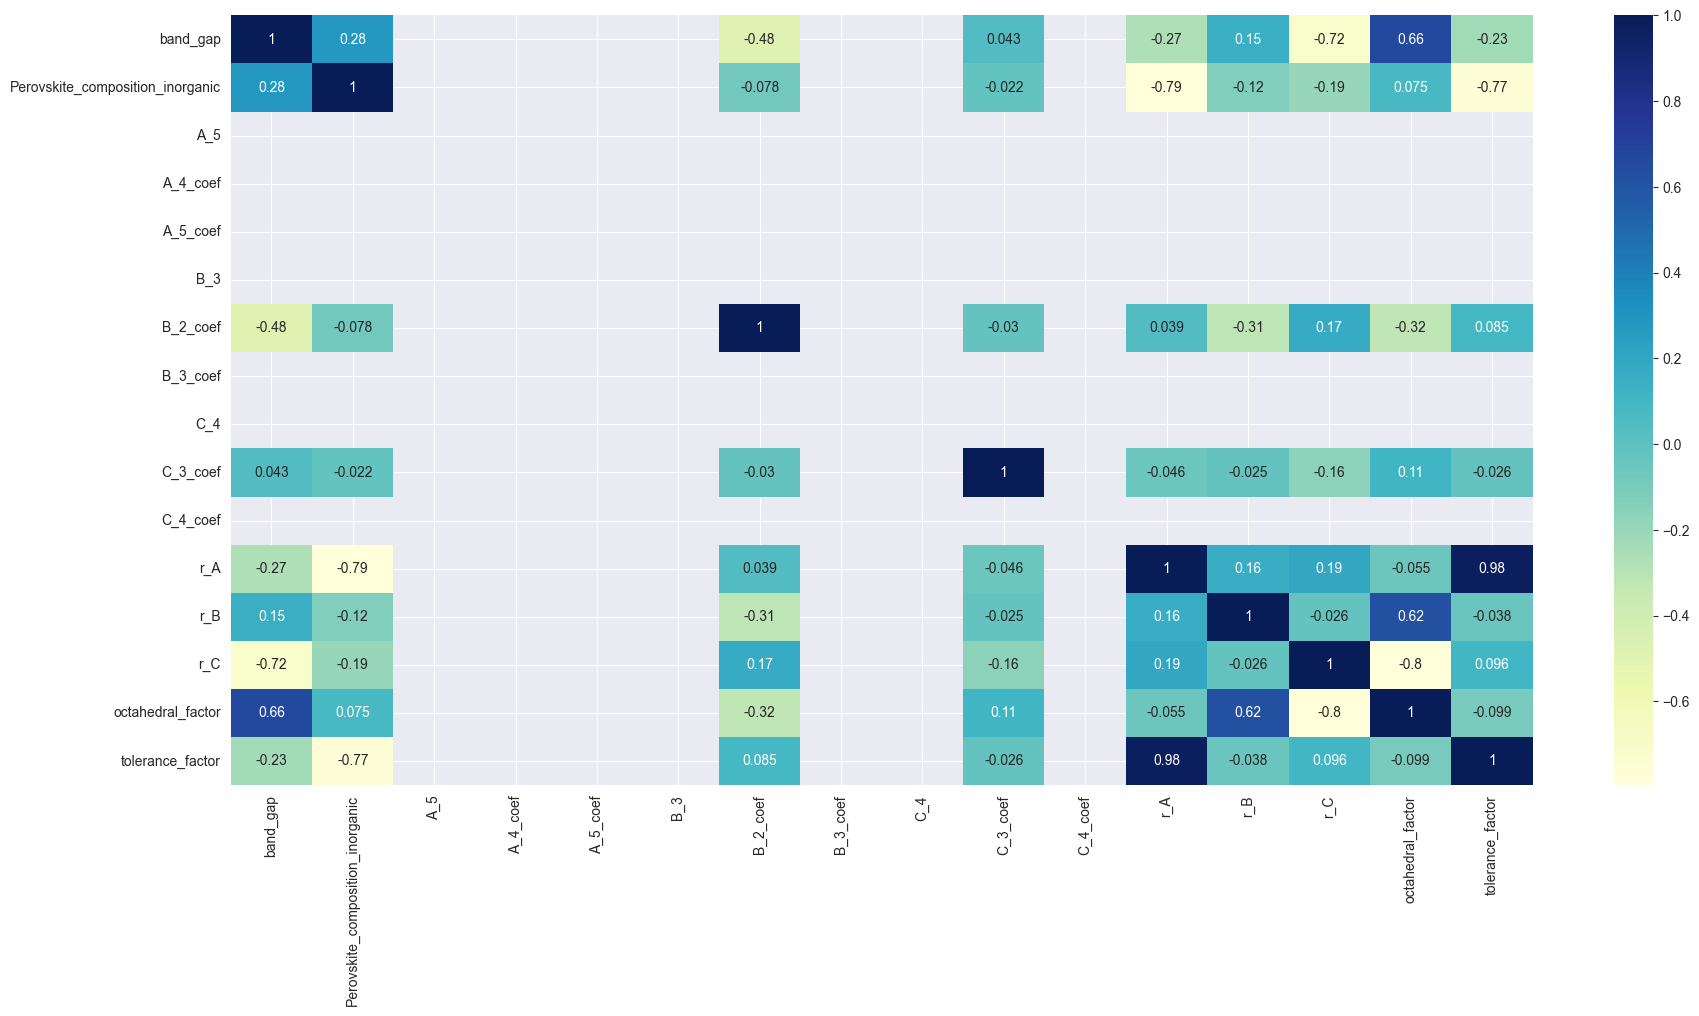

In [28]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
plt.figure(figsize=(21, 10))
sns.heatmap(df[num_df_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

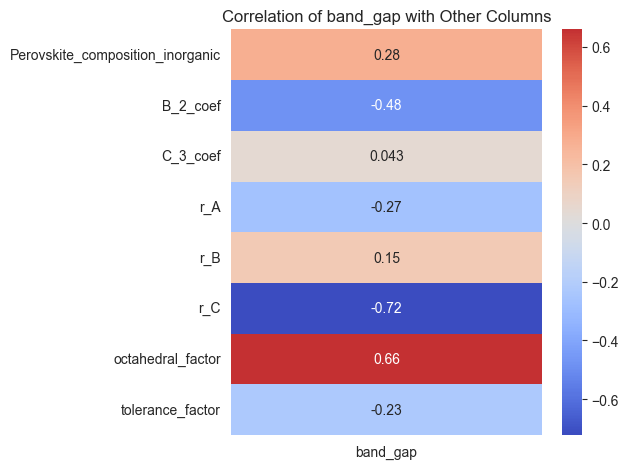

In [29]:
band_gap_corr = df[num_df_cols].corr()["band_gap"].drop("band_gap").dropna()
sns.heatmap(band_gap_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of band_gap with Other Columns')
plt.tight_layout()
plt.show()

### Check distributions - normalize if need

In [30]:
# check skew
skew_series = df[num_df_cols].drop("band_gap", axis=1).skew()
skew_series

Perovskite_composition_inorganic     3.034322
A_5                                  0.000000
A_4_coef                             0.000000
A_5_coef                             0.000000
B_3                                  0.000000
B_2_coef                             2.118588
B_3_coef                             0.000000
C_4                                  0.000000
C_3_coef                            13.373724
C_4_coef                             0.000000
r_A                                 -1.268744
r_B                                 -2.560116
r_C                                 -2.137093
octahedral_factor                    0.159493
tolerance_factor                    -1.207985
dtype: float64

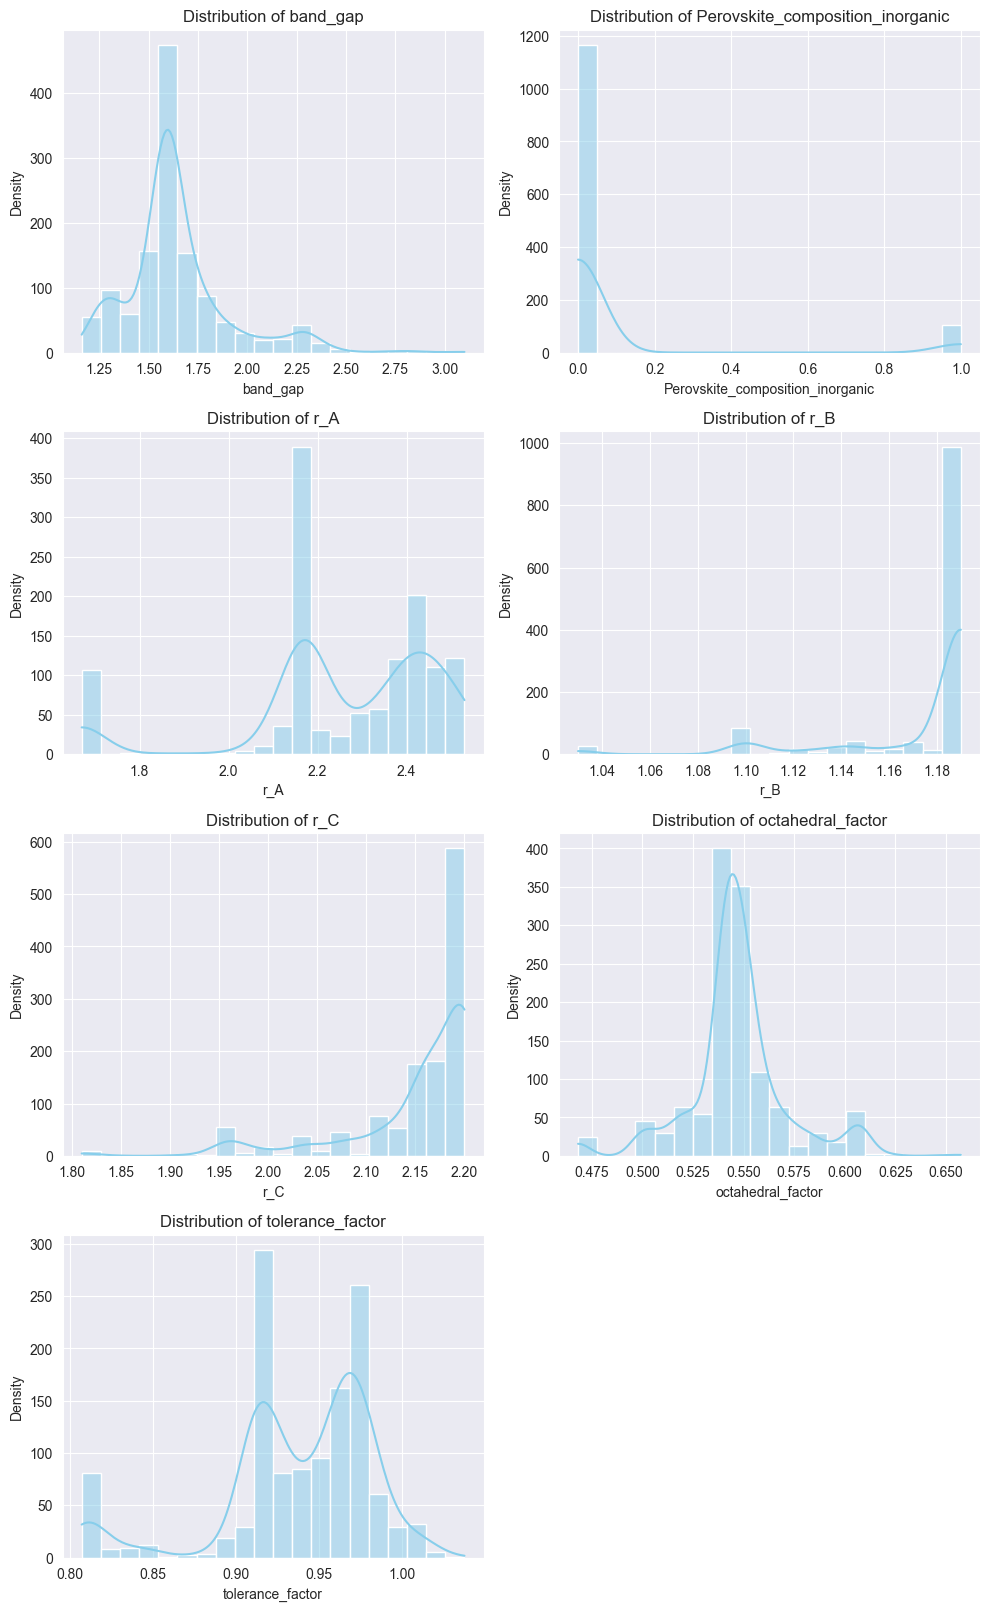

In [31]:
# plots
def _filter_ion_col(col: str) -> bool:
    if col.startswith("A") or col.startswith("B") or col.startswith("C"):
        return False
    return True


num_df_cols = list(filter(_filter_ion_col, num_df_cols))
num_df = df[num_df_cols]

n_cols = 2
n_features = df.shape[1]
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False)
axes = axes.flatten() if n_features > 1 else [axes]

# Plot distribution for each column
for i, column in enumerate(num_df.columns):
    sns.histplot(num_df[column], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

### Boxplots

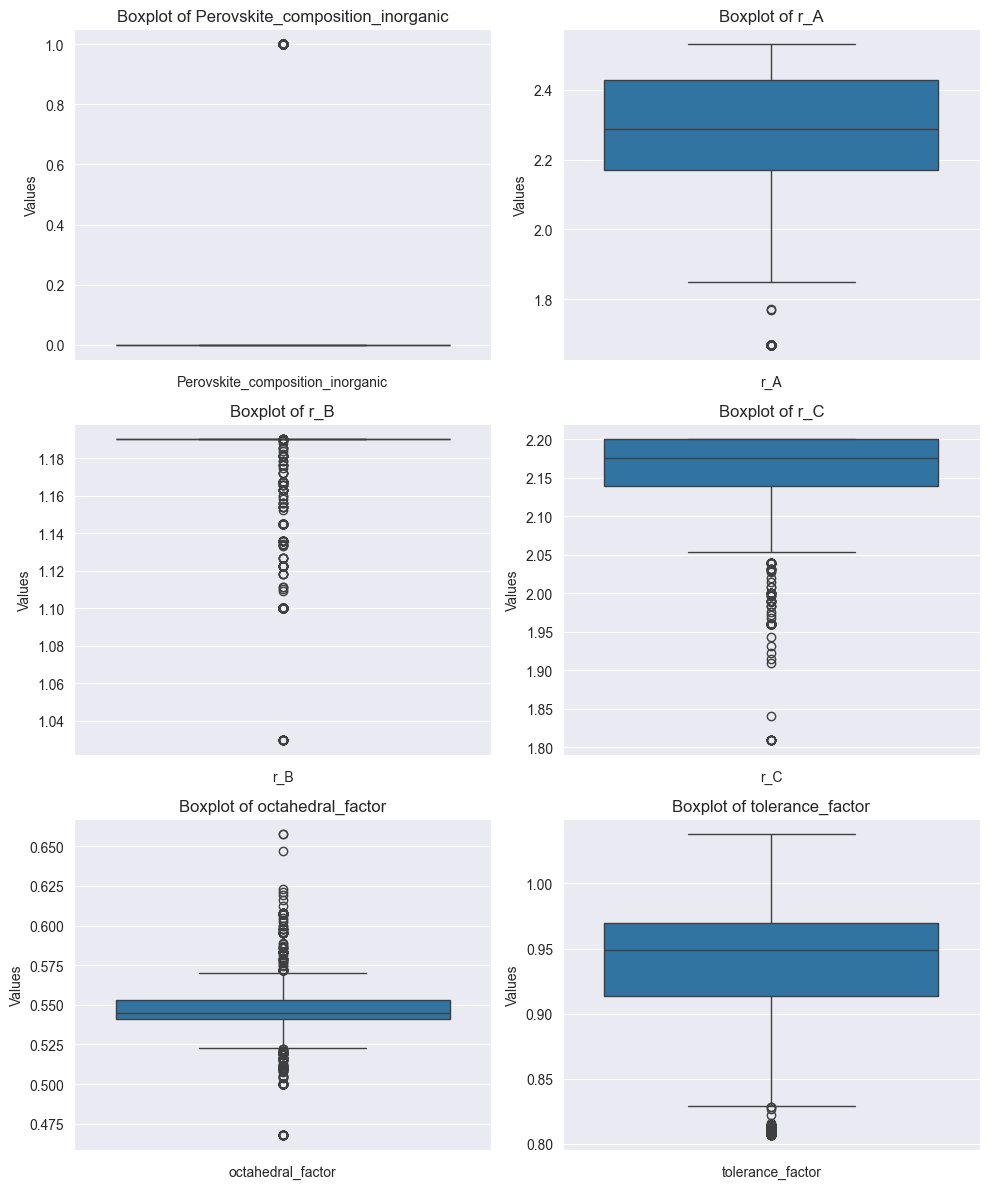

In [32]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
num_df_cols = list(filter(_filter_ion_col, num_df_cols))
num_df_cols.remove("band_gap")
num_df = df[num_df_cols]

n_cols = 2
n_features = num_df.shape[1]
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False)
axes = axes.flatten() if n_features > 1 else [axes]

for i, column in enumerate(num_df.columns):
    sns.boxplot(ax=axes[i], y=num_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Model building preprocess

In [33]:
from perovskite_prediction_api.entities.v1.elements import Elements

def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "-1":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Elements.get_element_by_name(ion)
    return element.code

In [34]:
ion_cols = ["A_1", "A_2", "A_3", "A_4", "A_5", "B_1", "B_2", "B_3", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df[col] = df[col].apply(encode_ion).astype(int)

In [35]:
# encode space groups
df["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)

In [36]:
df = df.drop(columns=["_composition"])

In [37]:
df["Perovskite_composition_inorganic"] = np.where(df["Perovskite_composition_inorganic"] == True, 1, 0)

In [38]:
df = df.reset_index(drop=True)
df = df.rename(columns={"Perovskite_composition_inorganic": "inorganic_composition"})
print("DF shape: ", df.shape)
df.head()

DF shape:  (1270, 32)


,band_gap,inorganic_composition,A_1,A_2,A_3,A_4,A_5,A_1_coef,A_2_coef,A_3_coef,...,C_1_coef,C_2_coef,C_3_coef,C_4_coef,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
0,1.60,0,1,-1,-1,-1,-1,1,-1,-1,...,3,-1,-1.0,-1,2.17000,1.19,2.2000,0.540909,0.911521,2
1,1.59,0,3,2,1,-1,-1,0.05,0.788,0.162,...,0.51,2.49,-1.0,-1,2.42868,1.19,2.1592,0.551130,0.968626,2
2,1.30,1,3,-1,-1,-1,-1,1,-1,-1,...,3,-1,-1.0,-1,1.67000,1.10,2.2000,0.500000,0.829243,4
3,1.40,1,3,-1,-1,-1,-1,1,-1,-1,...,0.6,2.4,-1.0,-1,1.67000,1.10,2.1520,0.511152,0.831046,4
4,1.50,0,2,-1,-1,-1,-1,1,-1,-1,...,3,-1,-1.0,-1,2.53000,1.19,2.2000,0.540909,0.986612,2


In [39]:
df.dtypes

band_gap                 float64
inorganic_composition      int64
A_1                        int64
A_2                        int64
A_3                        int64
A_4                        int64
A_5                        int64
A_1_coef                  object
A_2_coef                  object
A_3_coef                  object
A_4_coef                 float64
A_5_coef                   int64
B_1                        int64
B_2                        int64
B_3                        int64
B_1_coef                  object
B_2_coef                 float64
B_3_coef                   int64
C_1                        int64
C_2                        int64
C_3                        int64
C_4                        int64
C_1_coef                  object
C_2_coef                  object
C_3_coef                 float64
C_4_coef                   int64
r_A                      float64
r_B                      float64
r_C                      float64
octahedral_factor        float64
tolerance_

In [40]:
obj_columns = [col for col in df.columns if df[col].dtype == "object"]
f"Obj columns - {obj_columns}"

"Obj columns - ['A_1_coef', 'A_2_coef', 'A_3_coef', 'B_1_coef', 'C_1_coef', 'C_2_coef']"

In [41]:
for obj_col in obj_columns:
    df[obj_col] = df[obj_col].astype(np.float64)

In [42]:
ion_cols = [col for col in df.columns if col.startswith(("A", "B", "C"))]
print("Ion cols: ", ion_cols)
for col in ion_cols:
    if df[col].dtype == "float64":
        df[col] = np.where(df[col] == -1.0, 0, df[col])
    elif df[col].dtype == "int64":
        df[col] = np.where(df[col] == -1, 0, df[col])

for col in ion_cols:
    if (df[col] == 0).all():
        print(f"{col} is all 0")
        df.drop(columns=[col], inplace=True)
df.head()

Ion cols:  ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_1_coef', 'A_2_coef', 'A_3_coef', 'A_4_coef', 'A_5_coef', 'B_1', 'B_2', 'B_3', 'B_1_coef', 'B_2_coef', 'B_3_coef', 'C_1', 'C_2', 'C_3', 'C_4', 'C_1_coef', 'C_2_coef', 'C_3_coef', 'C_4_coef']
A_4 is all 0
A_5 is all 0
A_4_coef is all 0
A_5_coef is all 0
B_3 is all 0
B_3_coef is all 0
C_4 is all 0
C_4_coef is all 0


,band_gap,inorganic_composition,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,B_1,B_2,...,C_3,C_1_coef,C_2_coef,C_3_coef,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
0,1.60,0,1,0,0,1.00,0.000,0.000,33,0,...,0,3.00,0.00,0.0,2.17000,1.19,2.2000,0.540909,0.911521,2
1,1.59,0,3,2,1,0.05,0.788,0.162,33,0,...,0,0.51,2.49,0.0,2.42868,1.19,2.1592,0.551130,0.968626,2
2,1.30,1,3,0,0,1.00,0.000,0.000,34,0,...,0,3.00,0.00,0.0,1.67000,1.10,2.2000,0.500000,0.829243,4
3,1.40,1,3,0,0,1.00,0.000,0.000,34,0,...,0,0.60,2.40,0.0,1.67000,1.10,2.1520,0.511152,0.831046,4
4,1.50,0,2,0,0,1.00,0.000,0.000,33,0,...,0,3.00,0.00,0.0,2.53000,1.19,2.2000,0.540909,0.986612,2


### Build model

In [43]:
# build simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X, y = df.drop(columns=["band_gap"]), df["band_gap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 for lin reg: ", r2)
print("MSE for lin_reg: ", mse)

R2 for lin reg:  0.7748979067071473
MSE for lin_reg:  0.013209878759385918


/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [44]:
# get the best hyperparameters with GCV and build XGBoost Regressor
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

random_state = 42

param_grid = {
    "n_estimators": [300, 400, 500, 600],
    "learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
    "min_child_weight": [0.4, 0.5, 0.6, 0.8],
    "gamma": [0.05, 0.007, 0.009, 0.1],
    "subsample": [0.4, 0.5, 0.6, 0.7],
    "colsample_bytree": [0.3, 0.4, 0.6, 0.7],
}

xgb = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=random_state
)

search_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
search_cv.fit(X_train, y_train)
model = search_cv.best_estimator_

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

results = {
        "best_params": search_cv.best_params_,
        "best_cv_score": search_cv.best_score_,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_mse": train_mse,
        "test_mse": test_mse
    }

# Print results
print("Best Parameters:", results["best_params"])
print(f"Best Cross-Validation R² Score: {results['best_cv_score']:.4f}")
print(f"Train R²: {results['train_r2']:.4f}, Test R²: {results['test_r2']:.4f}")
print(f"Train MSE: {results['train_mse']:.4f}, Test MSE: {results['test_mse']:.4f}")

Best Parameters: {'colsample_bytree': 0.4, 'gamma': 0.05, 'learning_rate': 0.1, 'min_child_weight': 0.4, 'n_estimators': 500, 'subsample': 0.5}
Best Cross-Validation R² Score: 0.7704
Train R²: 0.8271, Test R²: 0.8142
Train MSE: 0.0127, Test MSE: 0.0109


In [45]:
# general train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')

MSE: 0.011078200955455761, R2: 0.8202681061276043


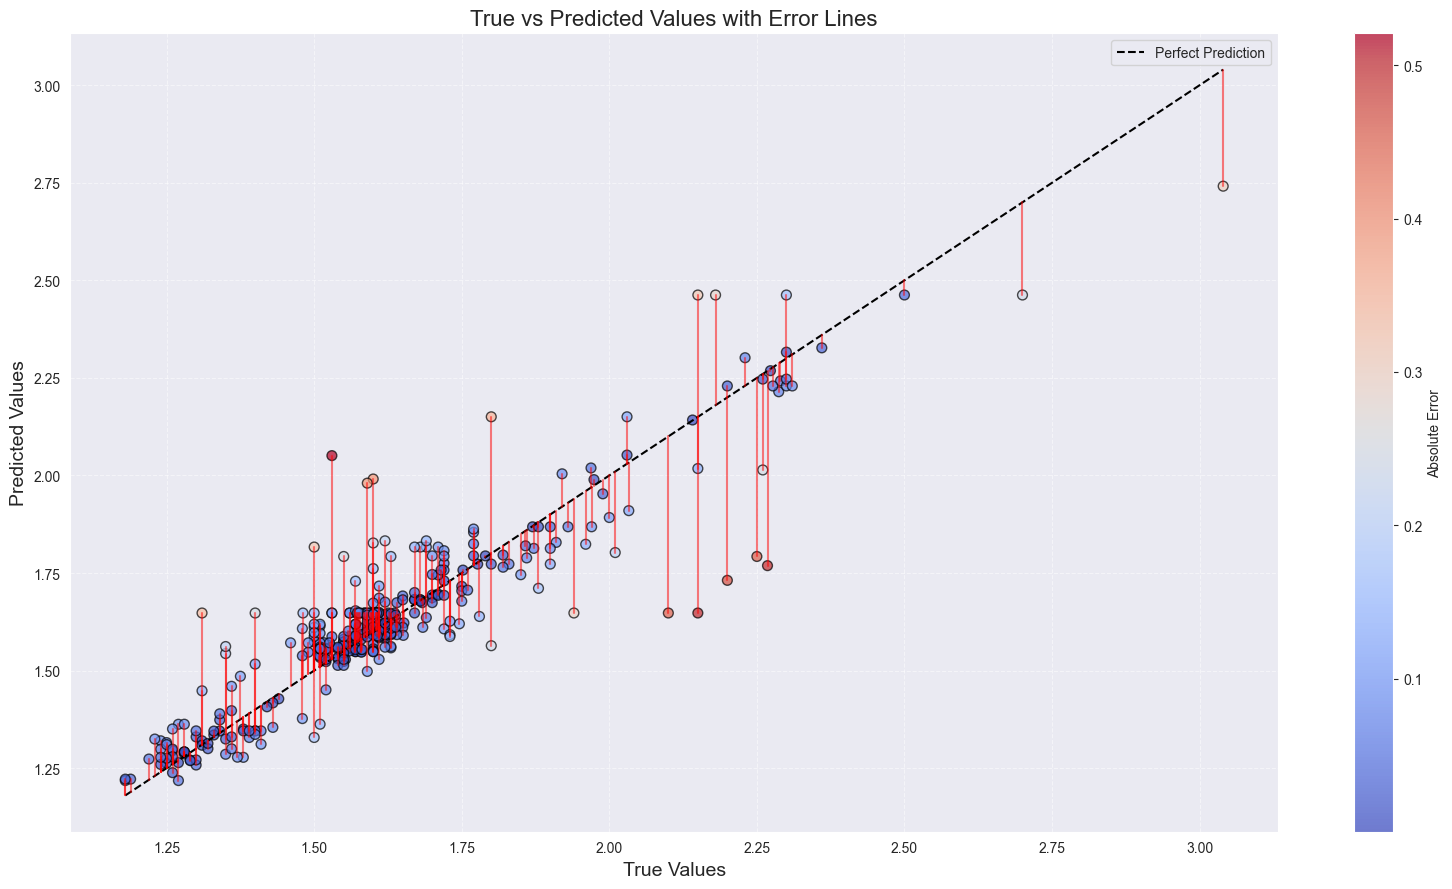

In [46]:
errors = np.abs(y_test - predictions)

plt.figure(figsize=(16, 9))
scatter = plt.scatter(y_test, predictions, c=errors, cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], predictions[i]], 'r-', alpha=0.5)

plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values with Error Lines', fontsize=16)
plt.colorbar(scatter, label='Absolute Error')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# save model
model.save_model('xgboost_band_gap_3D.json')
storage.upload_file('xgboost_band_gap_3D.json')